# Machine Learning Model for Spam Detection using End to End NLP Project
In this part of Machine Learning, we will use SMS Spam Collection Data Set which is available from this UCI Machine Learning Repository(https://drive.google.com/file/d/1qpPwOdKChwMCDbL8j6JO2KzHCWcWftRF/view?usp=sharing).The data set is a public set of SMS labeled messages that have been collected for mobile phone spam research.

# 1. Import the required libraries and Load the data

In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# importing the adult data
df = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])

# 2. Performing the Exploratory Data Analysis on the data set

In [3]:
## initialise the inbuilt stemmer
stemmer = PorterStemmer()

# SMS Spam Collection Data Set:

## Abstract: 

The SMS Spam Collection is a public set of SMS labeled messages that have been collected for mobile phone spam research.

## Attribute Information:

### The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow:
<ul>
<li>ham What you doing?how are you?</li>
<li>ham Ok lar... Joking wif u oni...</li>
<li>ham dun say so early hor... U c already then say...</li>
<li>ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H*</li>
<li>ham Siva is in hostel aha:-.</li>
<li>ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor.</li>
<li>spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop</li>
<li>spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B</li>
<li>spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU</li>


In [4]:
# head of dataframe
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# shape of dataframe
print(df.shape)

(5572, 2)


In [6]:
# value_counts on lable column
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

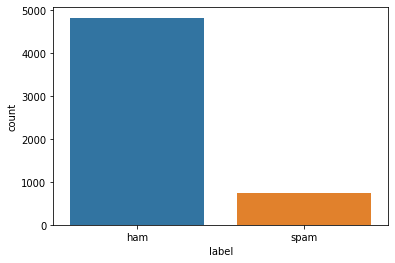

In [7]:
sns.countplot(x='label',data=df)

In [8]:
# initialise the lists
clean_sms_lst = []
sms_len_lst = []

# 3. Preprocess the data

In [9]:
def preprocess(raw_sms,flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_sms)
    
    # Conversion of sentence to lowercase
    letters_only = letters_only.lower()

    # Tokenize into words
    words = letters_only.split() 

    # Lemmatization
    words = [stemmer.stem(word) for word in words]
        
    clean_sms_lst.append(" ".join(words))
    
    sms_len_lst.append(len(words))

In [10]:
%%time

clean_sms_lst = []

sms_len_lst = []

df['text'].apply(lambda x: preprocess(x, 'stem'))

df['clean_sms_stem'] = clean_sms_lst 

df['sms_len_stem'] = sms_len_lst 

Wall time: 1.09 s


In [11]:
df.head()

,label,text,clean_sms_stem,sms_len_stem
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazi avail onli in bugi...,20
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri in a wkli comp to win fa cup final ...,30
3,ham,U dun say so early hor... U c already then say...,u dun say so earli hor u c alreadi then say,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i don t think he goe to usf he live around...,14


# 4. Data Preparation

In [12]:
# Use Bag of Words to convert the Text data to Numerical Vectors
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(clean_sms_lst).toarray()

In [13]:
print(cv.get_feature_names())

['aah', 'aathi', 'abi', 'abiola', 'abl', 'about', 'abt', 'abta', 'ac', 'acc', 'accept', 'access', 'accid', 'accident', 'accordingli', 'account', 'ach', 'across', 'act', 'action', 'activ', 'actual', 'ad', 'add', 'addi', 'addict', 'address', 'admir', 'ador', 'adult', 'advanc', 'adventur', 'advic', 'advis', 'ae', 'aeronaut', 'aeroplan', 'affair', 'affect', 'afraid', 'aft', 'after', 'afternoon', 'aftr', 'again', 'against', 'age', 'ago', 'agre', 'ah', 'aha', 'ahead', 'ahmad', 'aight', 'ain', 'aint', 'air', 'airport', 'aiya', 'aiyah', 'aiyar', 'aiyo', 'al', 'album', 'alcohol', 'alert', 'alex', 'alfi', 'aliv', 'all', 'allah', 'allow', 'almost', 'alon', 'along', 'alreadi', 'alright', 'alrit', 'also', 'alway', 'alwi', 'am', 'amaz', 'american', 'ami', 'among', 'amount', 'amp', 'amt', 'an', 'and', 'angri', 'ani', 'anim', 'announc', 'anoth', 'ansr', 'answer', 'anti', 'anybodi', 'anymor', 'anyon', 'anyth', 'anythin', 'anytim', 'anyway', 'anywher', 'apart', 'apologis', 'app', 'appar', 'appli', 'appo

In [14]:
# looking at unique words by using 'vocabulary_'
cv.vocabulary_

{'go': 872,
 'until': 2272,
 'point': 1615,
 'crazi': 492,
 'avail': 157,
 'onli': 1510,
 'in': 1038,
 'bugi': 296,
 'great': 896,
 'world': 2436,
 'la': 1155,
 'cine': 391,
 'there': 2146,
 'got': 887,
 'wat': 2353,
 'ok': 1499,
 'lar': 1164,
 'joke': 1108,
 'wif': 2399,
 'oni': 1509,
 'free': 809,
 'entri': 676,
 'wkli': 2423,
 'comp': 430,
 'to': 2184,
 'win': 2403,
 'fa': 719,
 'cup': 506,
 'final': 764,
 'tkt': 2179,
 'st': 2012,
 'may': 1313,
 'text': 2127,
 'receiv': 1732,
 'question': 1691,
 'std': 2023,
 'txt': 2238,
 'rate': 1710,
 'appli': 111,
 'over': 1538,
 'dun': 636,
 'say': 1827,
 'so': 1960,
 'earli': 642,
 'alreadi': 75,
 'then': 2144,
 'nah': 1424,
 'don': 613,
 'think': 2151,
 'he': 942,
 'goe': 875,
 'usf': 2294,
 'live': 1225,
 'around': 128,
 'here': 957,
 'though': 2158,
 'freemsg': 811,
 'hey': 959,
 'darl': 527,
 'it': 1079,
 'been': 201,
 'week': 2369,
 'now': 1477,
 'and': 90,
 'no': 1463,
 'word': 2433,
 'back': 170,
 'like': 1210,
 'some': 1968,
 'fun': 8

In [15]:
# Total numbers of unique words
print('Total unique words:',len(cv.vocabulary_))

Total unique words: 2500


In [16]:
# Identify and Preparation the target variable
# Identify and Preparation the target variable
y = pd.get_dummies(df['label'])
y = y.iloc[:,1].values

In [17]:
# Oberserving that the type of 'X' and 'y' is sparse
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
# Now looking at train_features 
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
# Now looking at test_features
print(y)

[0 0 1 ... 0 0 0]


In [20]:
# splitting into train and test and training the model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state=0)

# 5. Training the Model. Use the following algorithms:
1. Logistic Regression
2. Decision Trees
3. SVM

In [21]:
# importing the required liberaries for model building and evaluation.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
# Initializing all the required objects.
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
support = svm.SVC(probability = True)
models = {lr:'LogisticRegression',dtc:'DecisionTreeClassifier',support:'svm.SVC'}

# 6. Evaluationing each Model using following:
1. Check accuracy score
2. Build confusion metric
3. Print Classification_report


In [23]:
def performance(mod,anme,X_test,y_test,y_predict):
    score =accuracy_score(y_test,y_predict)
    print('-',name,':-\n')
    print('Accuracy score is:-',score)
    print('\nconfusion_matrix :- \n',confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print('*'*60)

In [24]:
dic = {"algo":[],"accuracy_score":[]}
for mod, name in models.items():
    fit = mod.fit(X_train,y_train)
# Prediction    
    predict = fit.predict(X_test)    
    performance(mod, name,X_test,y_test, predict)
    dic["algo"].append(name)
    dic["accuracy_score"].append(accuracy_score(y_test,predict))

- LogisticRegression :-

Accuracy score is:- 0.979372197309417

confusion_matrix :- 
 [[950   5]
 [ 18 142]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       955
           1       0.97      0.89      0.93       160

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

************************************************************
- DecisionTreeClassifier :-

Accuracy score is:- 0.9632286995515695

confusion_matrix :- 
 [[929  26]
 [ 15 145]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       955
           1       0.85      0.91      0.88       160

    accuracy                           0.96      1115
   macro avg       0.92      0.94      0.93      1115
weighted avg       0.96      0.96      0.96      1115

************************************************************
-